<a href="https://colab.research.google.com/github/Nicolaser1102/Popularidad_albumes_de_musica/blob/main/Popularidad_albumes_de_musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:25/2/2022
## Fecha de actualización: 26/2/2022
## Esteban Simbaña

#Proyecto 2 - Coding Dojo

## Popularidad de los álbumes de música de acuerdo a sus características

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importamos librerías que ocuparemos 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Montamos df
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Proyecto 2/train.csv'
df = pd.read_csv(nombrearchivo)
df.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.0420,0.0298,0.0751,0.537,0.61500,0.319,0.000000,0.000022,0.000006,0.125,0.1080,0.0407,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,238293.0,0.814,0.826,0.697,0.566,0.816,0.593,10.0,1.0,2.0,0.0,0.0,0.0,0.3440,0.0683,0.1940,0.081,0.02010,0.227,0.000023,0.000939,0.000000,0.106,0.1270,0.1100,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,160293.0,0.357,0.638,0.670,0.238,0.523,0.700,8.0,1.0,1.0,0.0,1.0,1.0,0.2650,0.3570,0.1960,0.142,0.00454,0.576,0.085900,0.000000,0.000005,0.550,0.0842,0.2260,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,205373.0,0.640,0.629,0.616,0.707,0.721,0.327,8.0,6.0,5.0,1.0,1.0,1.0,0.0283,0.0277,0.0264,0.026,0.50200,0.472,0.000001,0.000000,0.000001,0.182,0.3070,0.1210,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,89106.0,0.773,0.488,0.653,0.437,0.311,0.159,9.0,1.0,1.0,1.0,1.0,1.0,0.0963,0.0631,0.0551,0.836,0.48600,0.812,0.000024,0.000008,0.000000,0.544,0.1130,0.1550,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [5]:
#Confirmamos si la base se subió correctamente 
df.shape

(160000, 45)

# Limpieza de datos

In [6]:
#Visualizamos cuantos y los tipos de datos contiene cada columna 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            160000 non-null  int64  
 1   name          160000 non-null  object 
 2   release_date  160000 non-null  object 
 3   artists       160000 non-null  object 
 4   total_tracks  160000 non-null  int64  
 5   t_name0       160000 non-null  object 
 6   t_name1       112284 non-null  object 
 7   t_name2       108467 non-null  object 
 8   t_dur0        160000 non-null  int64  
 9   t_dur1        112284 non-null  float64
 10  t_dur2        108467 non-null  float64
 11  t_dance0      159786 non-null  float64
 12  t_dance1      112159 non-null  float64
 13  t_dance2      108390 non-null  float64
 14  t_energy0     159786 non-null  float64
 15  t_energy1     112159 non-null  float64
 16  t_energy2     108390 non-null  float64
 17  t_key0        159786 non-null  float64
 18  t_ke

Apartamos las columnas que tienen muchos datos faltantes para comprobar si se pueden eliminar

In [7]:
#Se muestran las columnas que tienen datos faltantes
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count_b = miss_values_count[miss_values_count != 0]
miss_values_count_b

t_name1      47716
t_name2      51533
t_dur1       47716
t_dur2       51533
t_dance0       214
t_dance1     47841
t_dance2     51610
t_energy0      214
t_energy1    47841
t_energy2    51610
t_key0         214
t_key1       47841
t_key2       51610
t_mode0        214
t_mode1      47841
t_mode2      51610
t_speech0      214
t_speech1    47841
t_speech2    51610
t_acous0       214
t_acous1     47841
t_acous2     51610
t_ins0         214
t_ins1       47841
t_ins2       51610
t_live0        214
t_live1      47841
t_live2      51610
t_val0         214
t_val1       47841
t_val2       51610
t_tempo0       214
t_tempo1     47841
t_tempo2     51610
t_sig0         214
t_sig1       47841
t_sig2       51610
dtype: int64

Se observa un patrón donde las canciones seleccionadas 1 y 2, en sus respectivas características existen una gran parte de datos faltantes.

Ya que el 30% de datos faltantes se consideran que pueden ser eliminadas

**En este caso al tener una df extensa, se optará a que las columnas que tengan un número grande de filas con datos faltantes, eliminarlas**

In [8]:
#creamos lista de nombres de las columnas cocn datos faltantes
nombres_columnas = list(miss_values_count_b.keys())
nombres_columnas

['t_name1',
 't_name2',
 't_dur1',
 't_dur2',
 't_dance0',
 't_dance1',
 't_dance2',
 't_energy0',
 't_energy1',
 't_energy2',
 't_key0',
 't_key1',
 't_key2',
 't_mode0',
 't_mode1',
 't_mode2',
 't_speech0',
 't_speech1',
 't_speech2',
 't_acous0',
 't_acous1',
 't_acous2',
 't_ins0',
 't_ins1',
 't_ins2',
 't_live0',
 't_live1',
 't_live2',
 't_val0',
 't_val1',
 't_val2',
 't_tempo0',
 't_tempo1',
 't_tempo2',
 't_sig0',
 't_sig1',
 't_sig2']

In [9]:
columnas_drop = [] #creamos lista que contendrá los nombres de las columnas con mayores datos faltanes 
for i in range (len(miss_values_count_b)):
  if (miss_values_count_b[i] > 220):
      columnas_drop.append(nombres_columnas[i])

In [10]:
columnas_drop #columnas que tienen la mayoría de datos faltantes

['t_name1',
 't_name2',
 't_dur1',
 't_dur2',
 't_dance1',
 't_dance2',
 't_energy1',
 't_energy2',
 't_key1',
 't_key2',
 't_mode1',
 't_mode2',
 't_speech1',
 't_speech2',
 't_acous1',
 't_acous2',
 't_ins1',
 't_ins2',
 't_live1',
 't_live2',
 't_val1',
 't_val2',
 't_tempo1',
 't_tempo2',
 't_sig1',
 't_sig2']

In [11]:
#eliminamos las filas que contienen datos faltantes 
df1 = df.dropna(subset=columnas_drop)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108348 entries, 0 to 159997
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108348 non-null  int64  
 1   name          108348 non-null  object 
 2   release_date  108348 non-null  object 
 3   artists       108348 non-null  object 
 4   total_tracks  108348 non-null  int64  
 5   t_name0       108348 non-null  object 
 6   t_name1       108348 non-null  object 
 7   t_name2       108348 non-null  object 
 8   t_dur0        108348 non-null  int64  
 9   t_dur1        108348 non-null  float64
 10  t_dur2        108348 non-null  float64
 11  t_dance0      108213 non-null  float64
 12  t_dance1      108348 non-null  float64
 13  t_dance2      108348 non-null  float64
 14  t_energy0     108213 non-null  float64
 15  t_energy1     108348 non-null  float64
 16  t_energy2     108348 non-null  float64
 17  t_key0        108213 non-null  float64
 18  t_ke

Seguimos teniendo un Data Frame bastante extenso, por lo que ahora se presentarán las columnas con los datos faltantes que quedan

In [12]:
df1.isnull().sum()

id                0
name              0
release_date      0
artists           0
total_tracks      0
t_name0           0
t_name1           0
t_name2           0
t_dur0            0
t_dur1            0
t_dur2            0
t_dance0        135
t_dance1          0
t_dance2          0
t_energy0       135
t_energy1         0
t_energy2         0
t_key0          135
t_key1            0
t_key2            0
t_mode0         135
t_mode1           0
t_mode2           0
t_speech0       135
t_speech1         0
t_speech2         0
t_acous0        135
t_acous1          0
t_acous2          0
t_ins0          135
t_ins1            0
t_ins2            0
t_live0         135
t_live1           0
t_live2           0
t_val0          135
t_val1            0
t_val2            0
t_tempo0        135
t_tempo1          0
t_tempo2          0
t_sig0          135
t_sig1            0
t_sig2            0
popularity        0
dtype: int64

En este caso imputaremos el valor promedio entre las características de las canciones posteriores (1,2), en la columna con características (0)

In [13]:
df1.head(1)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.042,0.0298,0.0751,0.537,0.615,0.319,0.0,0.000022,0.000006,0.125,0.108,0.0407,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51


In [14]:
df1.reset_index(inplace=True, drop=True) #reseteamos los índices 

## Proceso para obtener los promedios de las características 1 y 2, e imputarlas en la característica 0 que contiene los datos faltantes

In [15]:
#convertimos en lista los valores de la columnas 1 y 2 de la respectiva cancion (característica 't_dance)
lista_td1 = list(df1['t_dance1'])
lista_td2 = list(df1['t_dance2'])

In [17]:
#reemplazamos los valores por el promedio de las caracteristicas propias de las canciones de cada album , con el promedio
df1 = df1.fillna(-1) #convertimos los valores 'nan' a -1 para no modificar las características que si tienen datos

lista_td = list(df1['t_dance0'])
for i in range ((len(lista_td))):
  if (lista_td[i] == -1): 
    df1['t_dance0'][i] = ((lista_td1[i]+lista_td2[i])/2) #imputamos el promedio en las características con datos faltantes
    

Realizamos el mismo proceso con las otras características

#### t_energy

In [19]:
#convertimos en lista los valores de la columnas 1 y 2 ,características 't_energy'
lista_te1 = list(df1['t_energy1'])
lista_te2 = list(df1['t_energy2'])


lista_te = list(df1['t_energy0'])
for i in range ((len(lista_te))):
  if (lista_te[i] == -1): 
    df1['t_energy0'][i] = ((lista_te1[i]+lista_te2[i])/2)


#### t_key

In [21]:
lista_tk1 = list(df1['t_key1'])
lista_tk2 = list(df1['t_key2'])
lista_tk = list(df1['t_key0'])

for i in range ((len(lista_tk))):
  if (lista_tk[i] == -1): 
    df1['t_key0'][i] = ((lista_tk1[i]+lista_tk2[i])/2)


#### t_mode

In [24]:
lista_tm1 = list(df1['t_mode1'])
lista_tm2 = list(df1['t_mode2'])
lista_tm = list(df1['t_mode0'])

for i in range ((len(lista_tm))):
  if (lista_tm[i] == -1): 
    df1['t_mode0'][i] = ((lista_tm1[i]+lista_tm2[i])/2)
    

#### t_speech

In [27]:
lista_ts1 = list(df1['t_speech1'])
lista_ts2 = list(df1['t_speech2'])
lista_ts = list(df1['t_speech0'])

for i in range ((len(lista_ts))):
  if (lista_ts[i] == -1): 
    df1['t_speech0'][i] = ((lista_ts1[i]+lista_ts2[i])/2)
 

#### t_acous

In [29]:
lista_ta1 = list(df1['t_acous1'])
lista_ta2 = list(df1['t_acous2'])
lista_ta = list(df1['t_acous0'])

for i in range ((len(lista_ta))):
  if (lista_ta[i] == -1): 
    df1['t_acous0'][i] = ((lista_ta1[i]+lista_ta2[i])/2)
    

#### t_ins

In [31]:
lista_ti1 = list(df1['t_ins1'])
lista_ti2 = list(df1['t_ins2'])
lista_ti = list(df1['t_ins0'])

for i in range ((len(lista_ti))):
  if (lista_ti[i] == -1): 
    df1['t_ins0'][i] = ((lista_ti1[i]+lista_ti2[i])/2)


t_live 

In [33]:
lista_tl1 = list(df1['t_live1'])
lista_tl2 = list(df1['t_live2'])
lista_tl = list(df1['t_live0'])

for i in range ((len(lista_tl))):
  if (lista_tl[i] == -1): 
    df1['t_live0'][i] = ((lista_tl1[i]+lista_tl2[i])/2)
    

t_val

In [35]:
lista_tv1 = list(df1['t_val1'])
lista_tv2 = list(df1['t_val2'])
lista_tv = list(df1['t_val0'])

for i in range ((len(lista_tv))):
  if (lista_tv[i] == -1): 
    df1['t_val0'][i] = ((lista_tv1[i]+lista_tv2[i])/2)
    

t_tempo

In [38]:
lista_tt1 = list(df1['t_tempo1'])
lista_tt2 = list(df1['t_tempo2'])
lista_tt = list(df1['t_tempo0'])

for i in range ((len(lista_tt))):
  if (lista_tt[i] == -1): 
    df1['t_tempo0'][i] = ((lista_tt1[i]+lista_tt2[i])/2)


t_sig

In [40]:
lista_tsi1 = list(df1['t_sig1'])
lista_tsi2 = list(df1['t_sig2'])
lista_tsi = list(df1['t_sig0'])

for i in range ((len(lista_tsi))):
  if (lista_tsi[i] == -1): 
    df1['t_sig0'][i] = ((lista_tsi1[i]+lista_tsi2[i])/2)
    

In [41]:
df1.isnull().sum() #verificamos si hay valores faltantes

id              0
name            0
release_date    0
artists         0
total_tracks    0
t_name0         0
t_name1         0
t_name2         0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
dtype: int64

In [ ]:
df1.describe()

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
count,108348.000000,108348.000000,1.083480e+05,1.083480e+05,1.083480e+05,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000
mean,80085.449718,15.720622,2.024607e+05,2.130622e+05,2.142606e+05,0.576725,0.608292,0.609609,0.605821,0.629992,0.616577,5.188541,5.202542,5.281159,0.624202,0.633044,0.626998,0.130905,0.118626,0.119759,0.307350,0.266099,0.275101,0.148496,0.127815,0.132828,0.212608,0.197759,0.190325,0.462549,0.495252,0.485094,119.085269,121.081699,120.604622,3.875932,3.910252,3.902518,51.998754
std,46191.330957,26.673182,1.164210e+05,1.028009e+05,9.507069e+04,0.184017,0.177040,0.179339,0.243762,0.231704,0.230890,3.562445,3.627223,3.571159,0.484073,0.481977,0.483605,0.153954,0.130570,0.132704,0.322103,0.300226,0.304170,0.306519,0.288621,0.292847,0.179095,0.163856,0.154990,0.262441,0.249914,0.252825,31.993972,30.525439,30.930512,0.559925,0.433526,0.465249,21.348850
min,0.000000,3.000000,1.485000e+03,4.120000e+03,4.285000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40091.750000,10.000000,1.491060e+05,1.691460e+05,1.693502e+05,0.459000,0.498000,0.500000,0.449000,0.490000,0.477000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.039300,0.039400,0.038800,0.028100,0.020600,0.026200,0.000000,0.000000,0.000000,0.098500,0.097400,0.098300,0.246000,0.301000,0.289000,94.814000,96.482000,95.999000,4.000000,4.000000,4.000000,37.000000
50%,80129.500000,13.000000,1.967785e+05,2.038130e+05,2.064530e+05,0.595000,0.631000,0.628000,0.635000,0.661000,0.648000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.060500,0.060300,0.059300,0.169000,0.132000,0.140000,0.000022,0.000011,0.000009,0.135000,0.129000,0.127000,0.453000,0.502000,0.482000,119.664000,120.012000,119.984000,4.000000,4.000000,4.000000,57.000000
75%,120043.250000,16.000000,2.415910e+05,2.428130e+05,2.449990e+05,0.713000,0.736000,0.743000,0.804000,0.812000,0.792000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,0.159000,0.147000,0.152000,0.546000,0.440000,0.458000,0.026600,0.007820,0.009890,0.281000,0.254000,0.237000,0.669000,0.691000,0.682000,140.025000,141.383750,141.015000,4.000000,4.000000,4.000000,69.000000
max,159997.000000,1190.000000,7.200021e+06,7.054236e+06,4.520334e+06,0.988000,0.992000,0.982000,1.000000,1.000000,1.000000,11.000000,11.000000,11.000000,1.000000,1.000000,1.000000,0.968000,0.971000,0.970000,0.996000,0.996000,0.996000,1.000000,1.000000,1.000000,0.995000,0.998000,0.996000,1.000000,1.000000,1.000000,239.713000,248.500000,246.322000,5.000000,5.000000,5.000000,100.000000


De esta manera podemos ver que todos los datos nan que tenían (-1) fueron eliminados y sustituidos

In [42]:
#Data frame final 
df1.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.0420,0.0298,0.0751,0.537,0.61500,0.319,0.000000,0.000022,0.000006,0.125,0.1080,0.0407,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,238293.0,0.814,0.826,0.697,0.566,0.816,0.593,10.0,1.0,2.0,0.0,0.0,0.0,0.3440,0.0683,0.1940,0.081,0.02010,0.227,0.000023,0.000939,0.000000,0.106,0.1270,0.1100,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,160293.0,0.357,0.638,0.670,0.238,0.523,0.700,8.0,1.0,1.0,0.0,1.0,1.0,0.2650,0.3570,0.1960,0.142,0.00454,0.576,0.085900,0.000000,0.000005,0.550,0.0842,0.2260,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,205373.0,0.640,0.629,0.616,0.707,0.721,0.327,8.0,6.0,5.0,1.0,1.0,1.0,0.0283,0.0277,0.0264,0.026,0.50200,0.472,0.000001,0.000000,0.000001,0.182,0.3070,0.1210,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,89106.0,0.773,0.488,0.653,0.437,0.311,0.159,9.0,1.0,1.0,1.0,1.0,1.0,0.0963,0.0631,0.0551,0.836,0.48600,0.812,0.000024,0.000008,0.000000,0.544,0.1130,0.1550,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [43]:
df1.shape

(108348, 45)

# Visualización de datos 

In [45]:
#Data frame que se usará para la visualización de datos
df.head(1)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.042,0.0298,0.0751,0.537,0.615,0.319,0.0,0.000022,0.000006,0.125,0.108,0.0407,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51


# Gráfico 1 
Popularidad de los álbumes a través de los años

In [46]:
df1['release_date'].sort_values() #se mirá desde y hasta que año fueron recogidos los datos

52088           0000
62323           0000
99733           0000
74003           0000
32319           1900
             ...    
30335     2021-09-16
102676    2021-09-16
61163     2021-09-16
72724     2021-09-16
77907     2021-09-16
Name: release_date, Length: 108348, dtype: object

Los datos contienen fechas desde 1900 hasta 2021 

Procedemos a filtrar la media de popularidad entre diferentes intervalos de años para representarlos en un 'line plot'

In [47]:
#lista que contendrá la media de la popularidad a través de los años 
popularidad_media = []

Filtro para año de lanzamiento entre el inicio (1900) a 1950

In [48]:
#filtraremos datos para obtener filtro desde el inicio (1900) hasta 1950 ya que no hay muchos datos de canciones
filter_less_1950 = df1['release_date'] < '1950-01-01'
df_prueba_less1950 = df1.loc[filter_less_1950, :]
df_prueba_less1950.shape

(23, 45)

In [49]:
#añadimos la media de popularidad para el intervalo de datos
popularidad_media.append(df_prueba_less1950['popularity'].mean())

Filtro para año de lanzamiento entre 1950 a 1975

In [50]:
#se crean intervalos donde filtraremos los datos de 1950 hasta 1975

filter1975 = df1['release_date'] > '1950-01-01'
filter1975_2 = df1['release_date'] < '1975-01-01'
df_prueba_less1975 = df1.loc[filter1975 & filter1975_2, :]
df_prueba_less1975.head()
df_prueba_less1975.shape

(2392, 45)

In [51]:
popularidad_media.append(df_prueba_less1975['popularity'].mean())

Filtro para año de lanzamiento entre 1975 a 1985

In [52]:
 #se crean intervalos donde filtraremos los datos de 1975 hasta 1985
filter1985 = df1['release_date'] > '1975-01-01'
filter1985_2 = df1['release_date'] < '1985-01-01'
df_prueba_less1985 = df1.loc[filter1985 & filter1985_2, :]
df_prueba_less1985.head()
df_prueba_less1985.shape

(3187, 45)

In [53]:
popularidad_media.append(df_prueba_less1985['popularity'].mean())

Filtro para año de lanzamiento entre 1985 a 1995

In [54]:
 #se crean intervalos donde filtraremos los datos de 1985 hasta 1995

filter1995 = df1['release_date'] > '1985-01-01'
filter1995_2 = df1['release_date'] < '1995-01-01'
df_prueba_less1995 = df1.loc[filter1995 & filter1995_2, :]
df_prueba_less1995.head()
df_prueba_less1995.shape

(4366, 45)

In [55]:
popularidad_media.append(df_prueba_less1995['popularity'].mean())

Filtro para año de lanzamiento entre 1995 a 2000

In [56]:
 #se crean intervalos donde filtraremos los datos de 1995 hasta 2000

filter2000 = df1['release_date'] > '1995-01-01'
filter2000_2 = df1['release_date'] < '2000-01-01'
df_prueba_less2000 = df1.loc[filter2000 & filter2000_2, :]
df_prueba_less2000.head()
df_prueba_less2000.shape

(3715, 45)

In [57]:
popularidad_media.append(df_prueba_less2000['popularity'].mean())

Filtro para año de lanzamiento entre 2000 a 2005

In [58]:
#se crean intervalos donde filtraremos los datos de 2000 hasta 2005
filter2005 = df1['release_date'] > '2000-01-01'
filter2005_2 = df1['release_date'] < '2005-01-01'
df_prueba_less2005 = df1.loc[filter2005 & filter2005_2, :]
df_prueba_less2005.head()
df_prueba_less2005.shape

(4973, 45)

In [59]:
popularidad_media.append(df_prueba_less2005['popularity'].mean())

Filtro para año de lanzamiento entre 2005 a 2010

In [60]:
 #se crean intervalos donde filtraremos los datos de 2005 hasta 2010
filter2010 = df1['release_date'] > '2005-01-01'
filter2010_2 = df1['release_date'] < '2010-01-01'
df_prueba_less2010 = df1.loc[filter2010 & filter2010_2, :]
df_prueba_less2010.head()
df_prueba_less2010.shape

(7079, 45)

In [61]:
popularidad_media.append(df_prueba_less2010['popularity'].mean())

Filtro para año de lanzamiento entre 2010 a 2015

In [62]:
 #se crean intervalos donde filtraremos los datos de 2010 hasta 2015
filter2015 = df1['release_date'] > '2010-01-01'
filter2015_2 = df1['release_date'] < '2015-01-01'
df_prueba_less2015 = df1.loc[filter2015 & filter2015_2, :]
df_prueba_less2015.head()
df_prueba_less2015.shape

(13239, 45)

In [63]:
popularidad_media.append(df_prueba_less2015['popularity'].mean())

Filtro para año de lanzamiento entre 2015 a 2017

In [64]:
#se crean intervalos donde filtraremos los datos de 2015 hasta 2017
filter2017 = df1['release_date'] > '2015-01-01'
filter2017_2 = df1['release_date'] < '2017-01-01'
df_prueba_less2017 = df1.loc[filter2017 & filter2017_2, :]
df_prueba_less2017.head()
df_prueba_less2017.shape


(9973, 45)

In [65]:
popularidad_media.append(df_prueba_less2017['popularity'].mean())

Filtro para año de lanzamiento entre 2017 a 2019

In [66]:
 #se crean intervalos donde filtraremos los datos de 2017 hasta 2019
filter2019 = df1['release_date'] > '2017-01-01'
filter2019_2 = df1['release_date'] < '2019-01-01'
df_prueba_less2019 = df1.loc[filter2019 & filter2019_2, :]
df_prueba_less2019.head()
df_prueba_less2019.shape


(16030, 45)

In [67]:
popularidad_media.append(df_prueba_less2019['popularity'].mean())

Filtro para año de lanzamiento de todo 2019

In [68]:
 #se crean intervalos donde filtraremos los datos de todo 2019
filter2020 = df1['release_date'] > '2019-01-01'
filter2020_2 = df1['release_date'] < '2020-01-01'
df_prueba_less2020 = df1.loc[filter2020 & filter2020_2, :]
df_prueba_less2020.head()
df_prueba_less2020.shape

(10348, 45)

In [69]:
popularidad_media.append(df_prueba_less2020['popularity'].mean())

Filtro para año de lanzamiento de todo 2020

In [70]:
#se crean intervalos donde filtraremos los datos de todo 2020
filter2020_2 = df1['release_date'] > '2020-01-01'
filter2020_2_2 = df1['release_date'] < '2020-12-31'
df_prueba_less2020_2 = df1.loc[filter2020_2 & filter2020_2_2, :]
df_prueba_less2020_2.head()
df_prueba_less2020_2.shape

(14024, 45)

In [71]:
popularidad_media.append(df_prueba_less2020_2['popularity'].mean())

Filtro para año de lanzamiento de todo 2021

In [72]:
 #se crean intervalos donde filtraremos los datos de todo el 2021 
filter2021 = df1['release_date'] > '2020-12-31'
filter2021_2 = df1['release_date'] < '2021-12-31'
df_prueba_less2021 = df1.loc[filter2021 & filter2021_2, :]
df_prueba_less2021.head()
df_prueba_less2021.shape

(17517, 45)

In [73]:
popularidad_media.append(df_prueba_less2021['popularity'].mean())

Verificamos si captamos todos los datos

In [74]:
lista_años = ['1900-1950','1950-1975','1975-1985','1985-1995','1995-2000','2000-2005','2005-2010',
              '2010-2015','2015-2017','2017-2019','2019','2020','2021']
len(lista_años)

13

In [75]:
len(popularidad_media)

13

### Graficamos

In [76]:
#Datos en x y en y 
x = lista_años 
y = popularidad_media

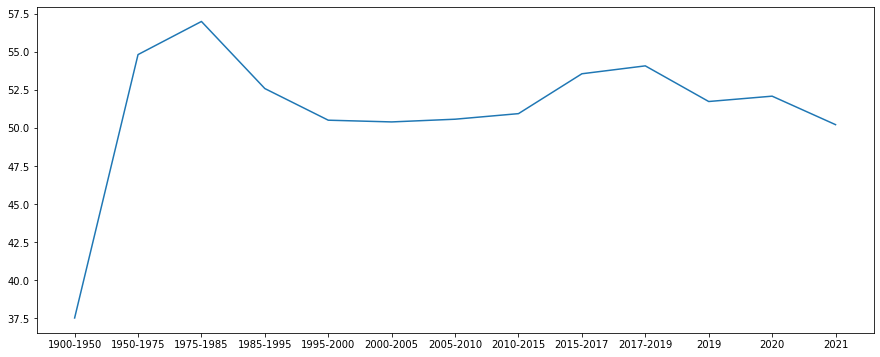

In [77]:
plt.figure(figsize= (15,6))
sns.lineplot(x=x,y= y);

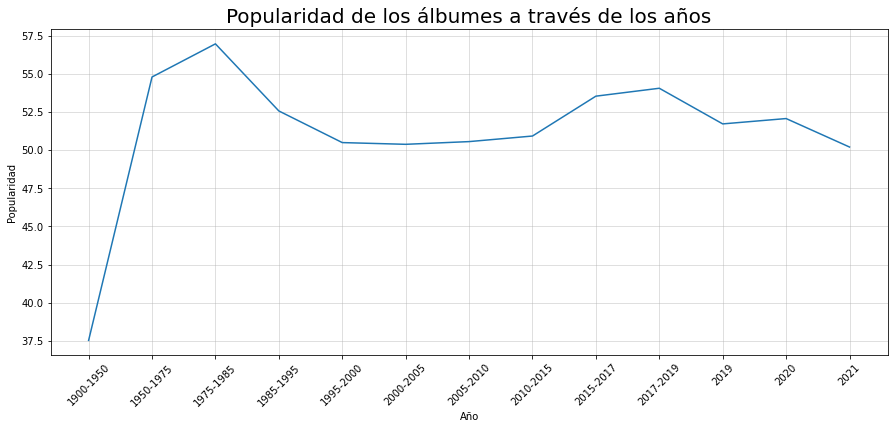

In [79]:
#mejoramos el gráfico
plt.figure(figsize= (15,6))
sns.lineplot(x=x,y= y);
plt.xlabel('Año',fontsize = 10) 
plt.ylabel('Popularidad',fontsize=10)
plt.title('Popularidad de los álbumes a través de los años',fontsize = 20)

plt.xticks(fontsize=10,rotation = 45)
plt.yticks(fontsize= 10)
plt.grid(alpha= 0.5)

- **Se observa que los álbumes sacados en los años entre 1975 hasta 1985 tienen un gran grado de popularidad**
- **Asimismo, los de 2019 hasta 2021 empiezan a decaer en popularidad aún siendo lanzados en la época actual. **

# Grafico 2 
Número de canciones que contienen los álbumes

En este caso realizaremos un histograma para poder visualizar el conteo

In [81]:
#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = df1.loc[:,'total_tracks']

### Graficamos

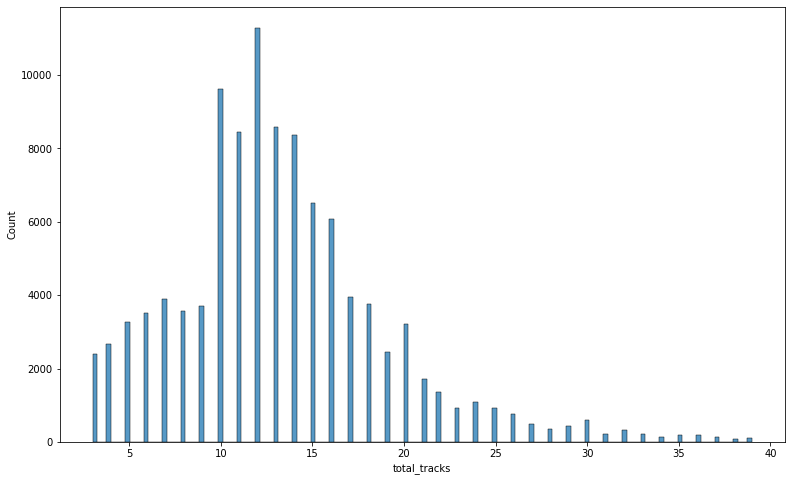

In [133]:
#creamos el histograma
histograma_1 = plt.figure(figsize= (13,8))
sns.histplot(datos_hist1)
pass

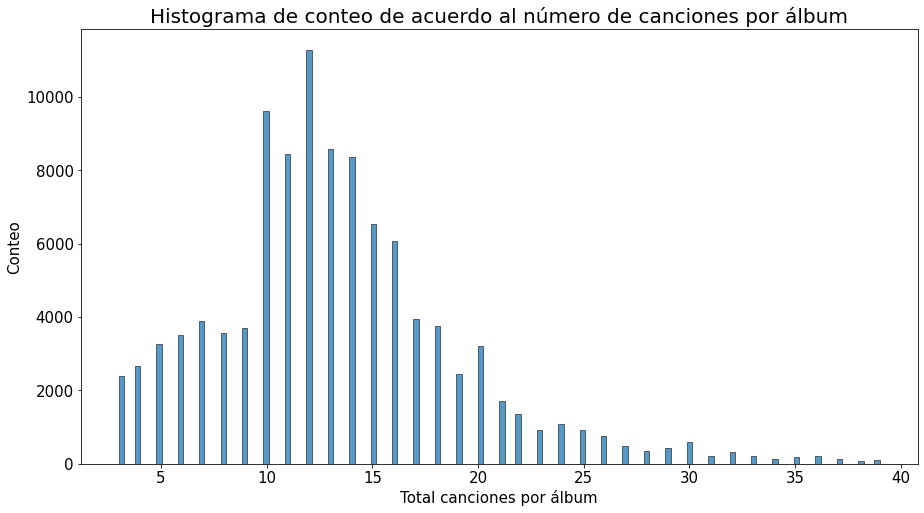

In [131]:
#mejoremos los datos para obtener una mejor visualización 
filtro_canciones =  df1['total_tracks'] < 40 #filtramos los datos para obtener el conteo de hasta máximo 40 canciones por álbum
df_filtro_canciones = df1.loc[filtro_canciones , :]
df_filtro_canciones.head()
df_filtro_canciones.shape

#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = df_filtro_canciones.loc[:,'total_tracks']

#se muestra el  histograma

histograma_1 = plt.figure(figsize= (15,8))
sns.histplot(datos_hist1)
plt.title('Histograma de conteo de acuerdo al número de canciones por álbum',fontsize = 20)
plt.ylabel('Conteo',fontsize=15)
plt.xlabel('Total canciones por álbum',fontsize=15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
pass

**Podemos ver en el gráfico que los álbumes en su gran mayoría contienen entre 10 y 15 canciones, donde ese sería el número que la mayoría de los artistas prefieren con respecto a la extensión que debe tener un álbum**

# Gráfico 3
Popularidad según el número de tracks

Se repetirá el proceso del primero gráfico con excepción a que los datos serán usados para un 'bar plot' o gráfico de barras

In [84]:
#se crea la lista donde se obtendrá la popularidad media según el numero de canciones 

total_tracks_popularity = []

Se creará un filtro donde se muestre la popularidad de los álbumes que contienen:
* de 0 a 10 canciones
* de 10 a 15 canciones ( que previamente visualizamos, son la mayoría)
* de 15 a 40 canciones 
* de 40 canciones a 1200 (maximo de canciones que puede tener un álbum)

Filtro para álbumes que tengan de 0 hasta 10 canciones en su álbum

In [85]:
#filtro de albumes que cuentas de 0 a 10 canciones 
total_tracks_filtro_10canciones = df1['total_tracks'] > 0
total_tracks_filtro_10canciones1 = df1['total_tracks'] < 10
df_filtro_10canciones = df1.loc[total_tracks_filtro_10canciones & total_tracks_filtro_10canciones1, :]


In [86]:
total_tracks_popularity.append(df_filtro_10canciones['popularity'].mean())

Filtro para álbumes que tengan de 10 hasta 15 canciones en su álbum

In [87]:
#filtro de albumes que cuentas de 10 a 15 canciones 
total_tracks_filtro_15canciones = df1['total_tracks'] > 10
total_tracks_filtro_15canciones1 = df1['total_tracks'] < 15
df_filtro_15canciones = df1.loc[total_tracks_filtro_15canciones & total_tracks_filtro_15canciones1, :]


In [88]:
total_tracks_popularity.append(df_filtro_15canciones['popularity'].mean())

Filtro para álbumes que tengan de 15 a 40 canciones

In [89]:
#filtro de albumes que cuentas de 15 a 40 canciones 
total_tracks_filtro_40canciones = df1['total_tracks'] > 15
total_tracks_filtro_40canciones1 = df1['total_tracks'] < 40
df_filtro_40canciones = df1.loc[total_tracks_filtro_40canciones & total_tracks_filtro_40canciones1, :]

In [90]:
total_tracks_popularity.append(df_filtro_40canciones['popularity'].mean())

Filtro para álbumes que tengan de 40 hasta 1200 (máximo de canciones por álbum)

In [91]:
#filtro de albumes que cuentas de 40 al maximo de canciones 
total_tracks_filtro_max_canciones = df1['total_tracks'] > 40

df_filtro_max_canciones = df1.loc[total_tracks_filtro_max_canciones, :]

In [92]:
total_tracks_popularity.append(df_filtro_max_canciones['popularity'].mean())

Verficamos si los datos tienen la misma longitud

In [93]:
len(total_tracks_popularity)

4

In [94]:
total_tracks = ['0-10','10-15','15-40','40-1200']
len(total_tracks)

4

### Graficamos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


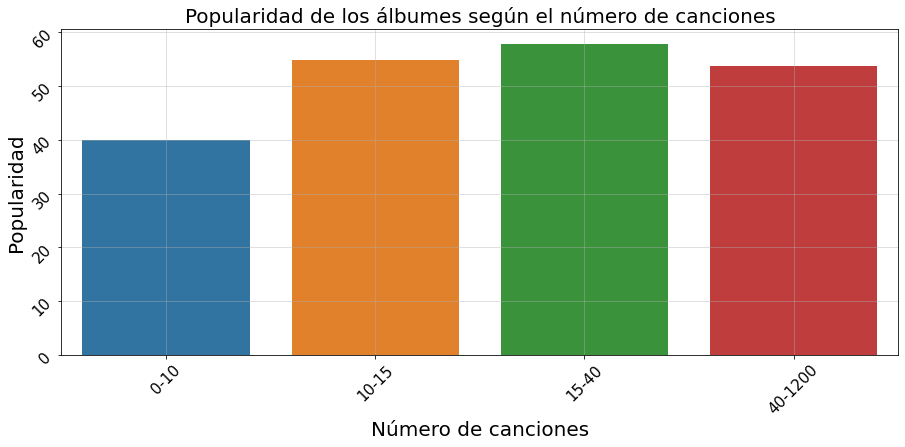

In [128]:
#utilizamos plantillas para el gráfico
plt.figure(figsize=(15,6))
sns.barplot(total_tracks,total_tracks_popularity)
plt.ylabel('Popularidad', fontsize=20)
plt.xlabel('Número de canciones',fontsize= 20)
plt.title('Popularidad de los álbumes según el número de canciones',fontsize=20)
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(rotation=45,fontsize=15)
plt.grid(alpha = 0.5)
pass

- **Como podemos ver en la gráfica, los álbumes que contengan entre 10 y 40 canciones, o hasta más; tendrán una gran posibilidad de obtener un puntaje de popularidad de más de 50.**

- **Por lo que un álbum puede conformarse, por ejemplo: con 15 canciones y tendría una popularidad muy similar al tener un álbum de 40 canciones o más; inferimos, que los artistas no deben introducir tantas canciones en los álbumes, lo que podría llegar a ser beneficioso para ellos ya que reduciría su trabajo.**

# Gráfico 4

Popularidad en relación a la característica 'track duration' o duración de la canción

In [96]:
#convertimos las columnas a listas para poder trabajar con los valores
lista_td1 = list(df1['t_dur1'])
lista_td2 = list(df1['t_dur2'])
lista_td = list(df1['t_dur0'])

In [97]:
#crearemos una nueva df para los datos del gráfico 4
df_graf_4 = df1 

In [99]:
#se crea una nueva columna en la df 'df_graf_4'
df_graf_4['t_dur_prom']=5 #se le asigna el número 5 a todos los valores
for i in range ((len(lista_td))):    
  df_graf_4['t_dur_prom'][i] = ((lista_td1[i]+lista_td2[i]+lista_td[i])/3) #se reemplaza a los valores por el promedio de 
                                                                            #duración de las canciones en cada fila


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
df_graf_4.head(1) #verificamos si la última columna es 't_dur_prom'

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.042,0.0298,0.0751,0.537,0.615,0.319,0.0,0.000022,0.000006,0.125,0.108,0.0407,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51,192284


In [103]:
#ahora, filtramos la columna con la que queremos realizar el histograma
datos_graf_4 = df_graf_4.loc[:,['t_dur_prom','popularity']]
#creamos el primer histograma
datos_graf_4.head()

,t_dur_prom,popularity
0,192284,51
1,195199,67
2,154768,81
3,203866,53
4,140693,70


In [104]:
#ordenamos los valores para que el gráfico se represente de las canciones con menor a myor duración
datos_graf_4.sort_values('t_dur_prom', inplace=True)
datos_graf_4.head()

,t_dur_prom,popularity
103207,8759,22
83480,16624,31
31908,16624,31
93472,16624,31
33882,21422,45


Verificamos cuantos datos hay en la data frame

In [105]:
datos_graf_4.shape

(108348, 2)

Datos para el gráfico en'x' y 'y'
Nota: Se realiza con el gráfico con las 100000 primeras filas para que el gráfico no se haga tan extenso 

In [106]:
graf_4_x = list(datos_graf_4['t_dur_prom'].head(100000))
graf_4_y = list(datos_graf_4['popularity'].head(100000))

### Graficamos

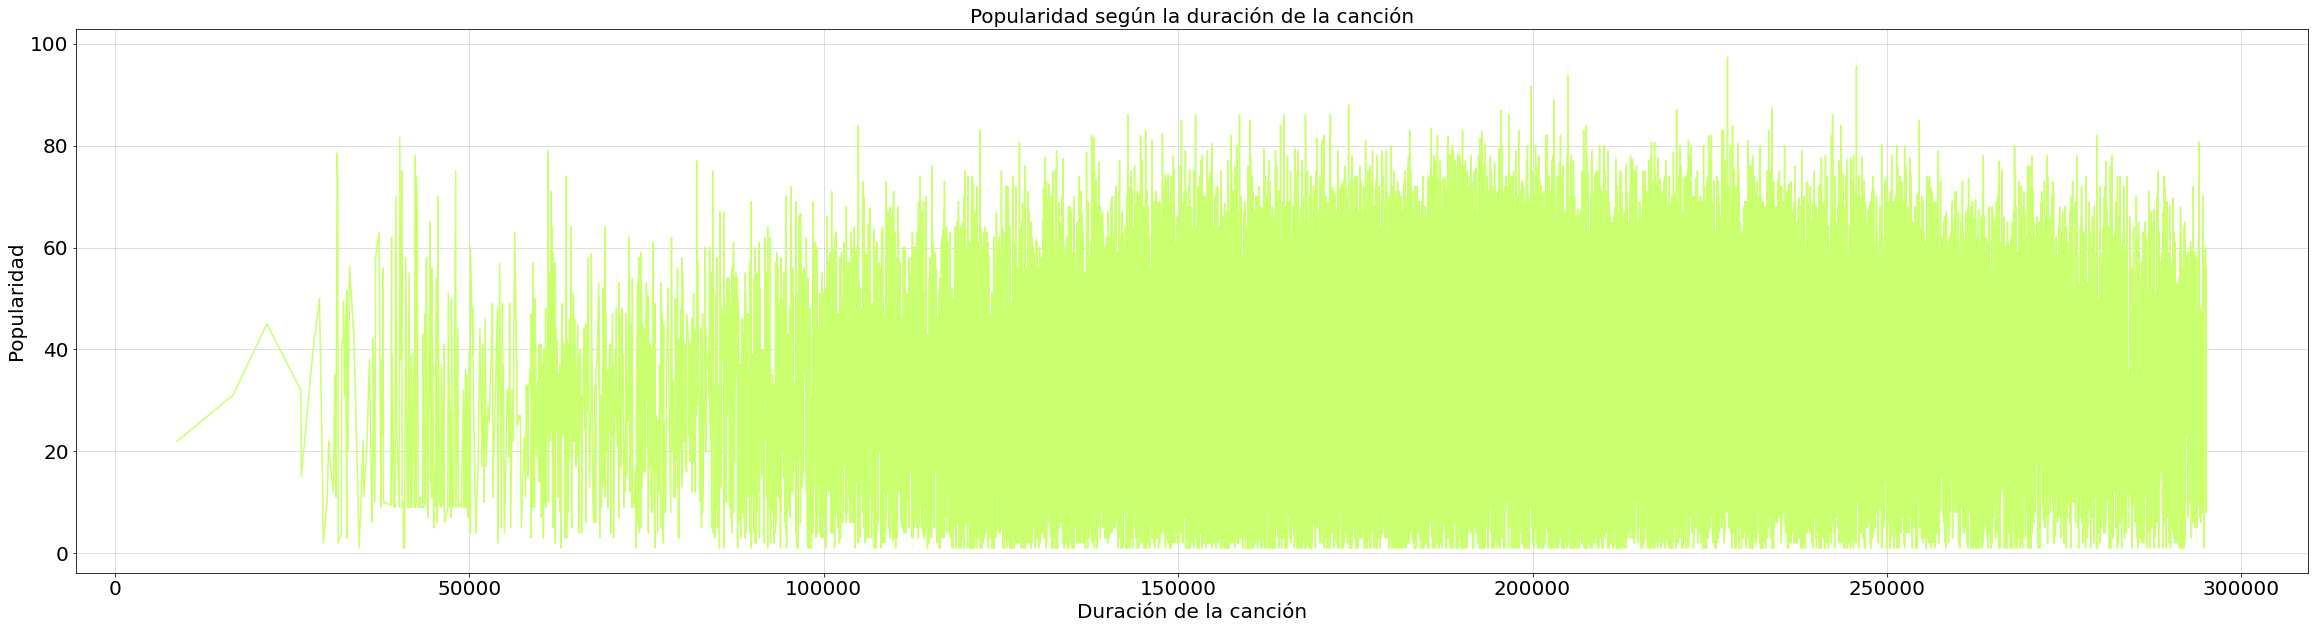

In [108]:
plt.figure(figsize= (40,10))
sns.lineplot(x= graf_4_x,y=graf_4_y,color= '#CAFF70')

plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
plt.grid(alpha = 0.5)
plt.ylabel('Popularidad', fontsize=20)
plt.xlabel('Duración de la canción',fontsize= 20)
plt.title('Popularidad según la duración de la canción',fontsize=20)
pass

- **El gráfico aunque a primera vista se vea saturado, principalmente nos indica que no importa la duración de las canciones en relación con la popularidad; pueden tener baja o alta popularidad al ser una canción de larga o corta duración**

# Gráfico 5 
Popularidad en relación con la cantidad de 'partes cantadas' dentro de las canciones


- En este caso tenemos en cuenta el diccionario que tenemos de la base de datos

Speechiness: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación, más cercano a 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.

Fuente: https://www.kaggle.com/elemento/music-albums-popularity-prediction

Al igual que en anteriores gráficos obtendremos el promedio de las diferentes canciones que tenemos de ejemplos en cada fila.

In [109]:
#creamos listas que contendran los valores las columnas que ocupamos
lista_ts1 = list(df1['t_speech1'])
lista_ts2 = list(df1['t_speech2'])
lista_ts = list(df1['t_speech0'])

In [110]:
#se crea un nueva columna en la base de datos principal (df1) donde se colocaraán los valores promedio de 't_speech'
df1['t_speech_prom']=5.0 # se le asigna un valor para todo la columna


In [111]:
#se cambian los valores por el promedio de las característica 't_speech' '0','1' y '2'
df1['t_speech_prom'].astype(float)
for i in range ((len(lista_td))):    
  df1['t_speech_prom'][i] = (float((lista_ts1[i]+lista_ts2[i]+lista_ts[i])/3.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [112]:
df1.head(1) #verificamos si la columna se creó correctamente y si contiene los valores que vamos a ocupar para el gráfico

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom,t_speech_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.042,0.0298,0.0751,0.537,0.615,0.319,0.0,0.000022,0.000006,0.125,0.108,0.0407,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51,192284,0.048967


Filtramos los datos de acuerdo a los intervalos presentados en el diccionario de la base de datos

In [115]:
#lista que contrendrá los valores de popularidad de cada intervalo en (t_speech)
total_speech_popularity =[]

Filtro de popularidad en relación de 'Speechiness' en los intervalos de 0 a 0.33

In [116]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten (0 hasta 0.33)
speechness_filtro_less_33 = df1['t_speech_prom'] > 0.0
speechness_filtro_less_33_1 = df1['t_speech_prom'] < 0.33
df_filtro_less_33 = df1.loc[speechness_filtro_less_33 & speechness_filtro_less_33_1, :]

total_speech_popularity.append(df_filtro_less_33['popularity'].mean()) #añadimos el promedio a la lista 
                                                                       #total_speech_popularity

Filtro de popularidad en relación de 'Speechiness' en los intervalos de 0.33 a 0.66

In [117]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten(3.33 hasta 6.66)
speechness_filtro_less_66 = df1['t_speech_prom'] > 0.33
speechness_filtro_less_66_1 = df1['t_speech_prom'] < 0.66
df_filtro_less_66 = df1.loc[speechness_filtro_less_66 & speechness_filtro_less_66_1, :]

total_speech_popularity.append(df_filtro_less_66['popularity'].mean()) #añadimos el promedio a la lista 
                                                                       #total_speech_popularity

Filtro de popularidad en relación de 'Speechiness' en los intervalos de 0.66 a 1

In [118]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten(3.33 hasta 6.66)
speechness_filtro_less_100 = df1['t_speech_prom'] > 0.66
speechness_filtro_less_100_1 = df1['t_speech_prom'] < 1.01
df_filtro_less_100 = df1.loc[speechness_filtro_less_100 & speechness_filtro_less_100_1, :]

total_speech_popularity.append(df_filtro_less_100['popularity'].mean()) #añadimos el promedio a la lista 
                                                                        #total_speech_popularity

Verificamos si los datos son correctos para graficarlos

In [121]:
len(total_speech_popularity)

3

In [122]:
total_speech_popularity

[52.36086618894557, 47.65505341002465, 27.898190045248867]

In [123]:
#creamos lista para poner los diferentes intervalos
intervalos_lista = []
intervalos_lista = ['0-0.33','0.33-0.66','0.66-1']

In [124]:
len(intervalos_lista)

3

### Gráficamos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


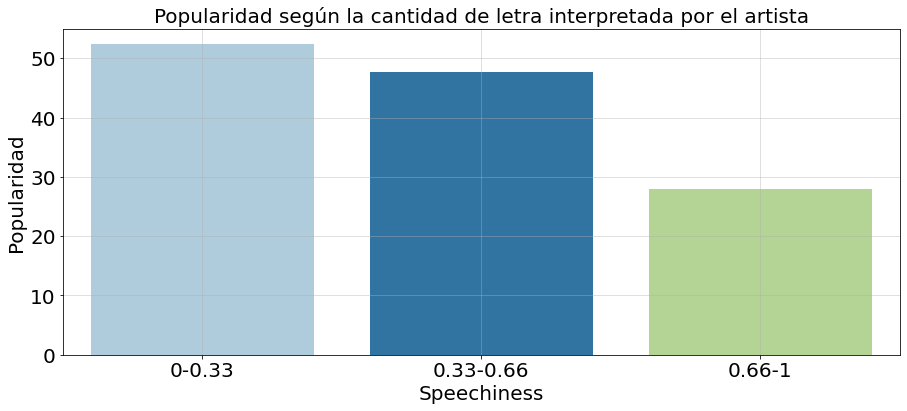

In [127]:
plt.figure(figsize=(15,6))
sns.barplot(intervalos_lista,total_speech_popularity,palette="Paired")


plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
plt.grid(alpha = 0.5)
plt.ylabel('Popularidad', fontsize=20)
plt.xlabel('Speechiness',fontsize= 20)
plt.title('Popularidad según la cantidad de letra interpretada por el artista',fontsize=20)

pass

- **La gráfica nos muestra que las canciones que tienen más sonido instrumental en toda la canción son más populares que las canciones que tienen mucha presencia de palabras cantadas por el artista.**

- **Por lo que intuimos otra vez que el artista podría preferir, en invertir en mayor manera la calidad de la música en si misma que en la letra (sin decir que se debe bajar la calidad de la letra de las canciones)**

## Correlación entre variables

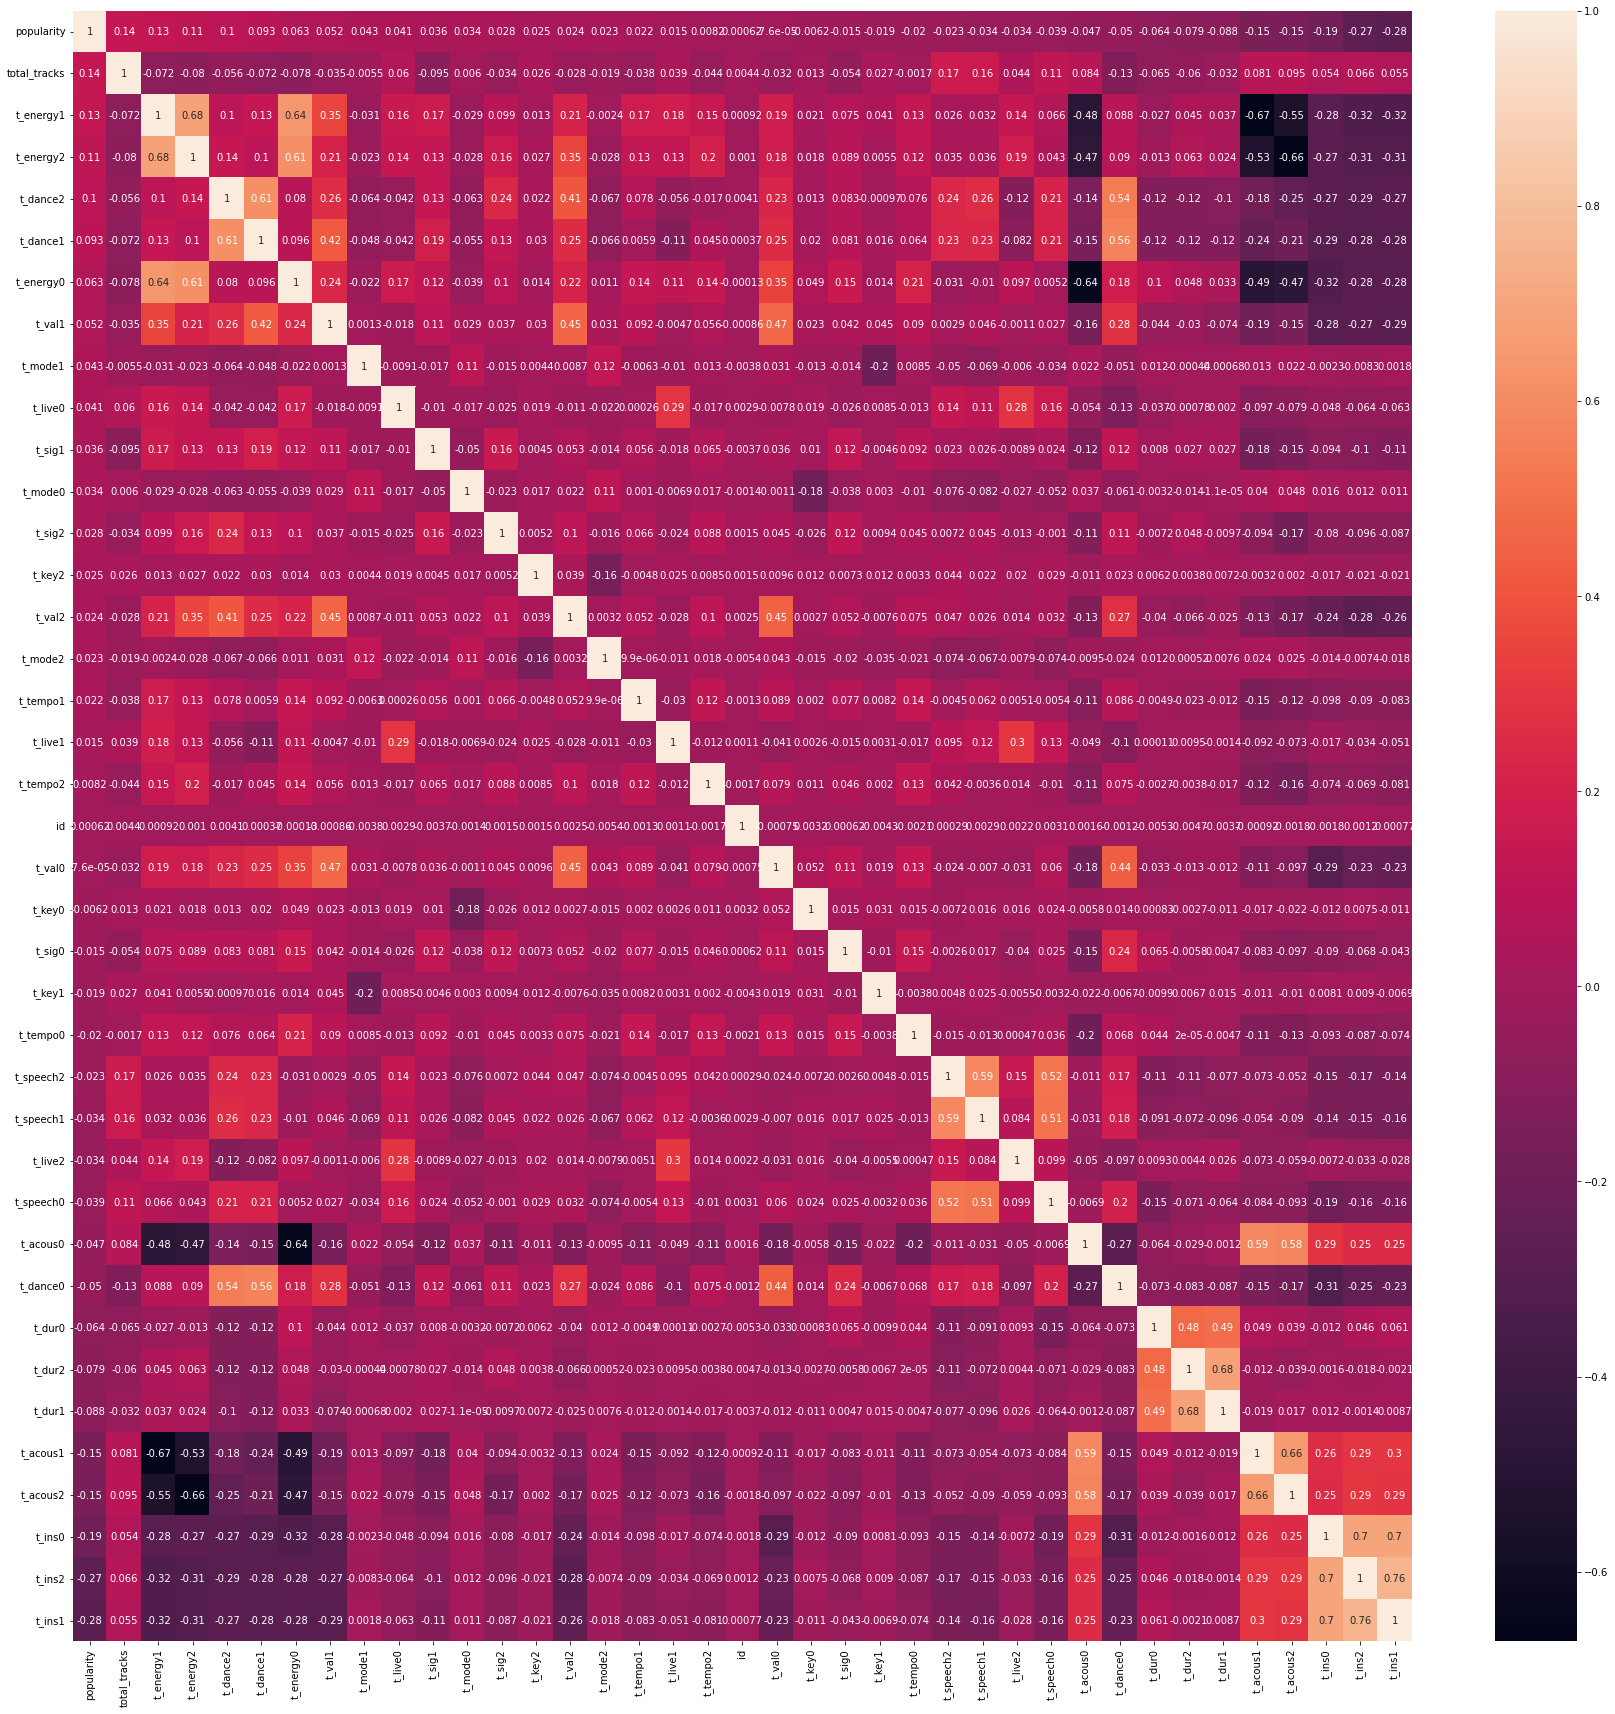

In [ ]:
corr = df.corr()
corr_cols = corr['popularity'].sort_values(ascending = False).head(60).index
corr_SalePrice = df[corr_cols].corr()
plt.subplots(figsize = (30, 30))
sns.heatmap(corr_SalePrice, annot = True)

Las columnas que tienen una correlación considerablemente positiva son:

- t_energy (0,1,2)
- t_dance (0,1,2)
- t_val(0,1,2)
- t_speech(0,1,2)
- t_inst(0,1,2)
- t_acous(0,1,2)
- t_dura(0,1,2)
